## Final Project Submission

Please fill out:
* Student name: Leah George
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# PROJECT / Microsoft


### 1. Importing libraries and necessary tools for data processing and visualization.


In [3]:
#import libraries for data processing
import pandas as pd
import numpy as np


#import visualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### Box Office Mojo

###### Data Processing and Cleaning

In [4]:
#loading data into a pandas data
bom_df = pd.read_csv("bom.movie_gross.csv.gz")
#view the first five rows
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
#basic information of the dataset
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


###### From the above information its clear that there are missing values in studio, domestic_gross and foreign_gross. Let's explore that!

In [6]:
#percentage of missing values in the said columns
print('Percentage of missing values per column:')
print (bom_df.isnull().sum()* 100/len(bom_df))


#number of missing values
print("Number of mising values in studio are:", bom_df['studio'].isnull().sum())
print("Number of mising values in domestic_gross are:", bom_df['domestic_gross'].isnull().sum())
print("Number of mising values in foreign_gross are:", bom_df['foreign_gross'].isnull().sum())


Percentage of missing values per column:
title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64
Number of mising values in studio are: 5
Number of mising values in domestic_gross are: 28
Number of mising values in foreign_gross are: 1350


###### I decided to drop all missing values to have consistent data for analysis.

In [7]:
bom_df=bom_df.dropna(subset = ['studio'])
bom_df=bom_df.dropna(subset = ['domestic_gross'])
bom_df = bom_df.dropna(subset = ['foreign_gross'])

In [8]:
#drop any duplicate entries
bom_df.drop_duplicates()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [9]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [10]:
#convert the foreign_gross entries to float 
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',','').astype(float)


In [11]:
#checking if the foreign_gross' data type is now float
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


In [12]:
#adding a column to have the total gross
bom_df['total_gross'] = bom_df['foreign_gross'] + bom_df['domestic_gross']

In [13]:
bom_df.head() #first five entries to confirm an additional column|

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


###### Exploratory Data Analysis

In [14]:
#calculating the mean of the total gross per studio
studio_mean_gross = bom_df.groupby('studio')['total_gross'].mean().sort_values(ascending = False)[:10]
studio_mean_gross

studio
HC          8.703000e+08
P/DW        5.076500e+08
BV          4.249075e+08
GrtIndia    2.542000e+08
WB          2.368577e+08
WB (NL)     2.344114e+08
Fox         2.311968e+08
Sony        2.133782e+08
Par.        2.068532e+08
Uni.        2.065751e+08
Name: total_gross, dtype: float64

Text(0, 0.5, 'Total Gross')

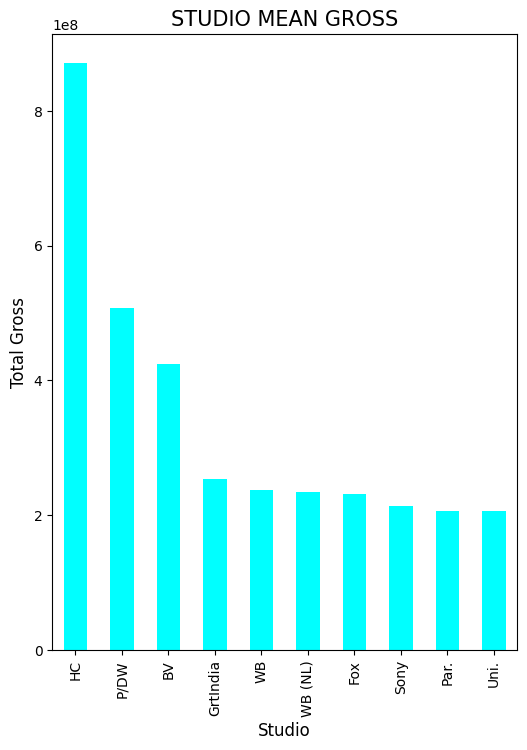

In [15]:
#a bar graph to visualize the mean gross per studio
ax = studio_mean_gross.plot(kind = 'bar', figsize = (6,8), color = '#00FFFF', width = 0.5)
ax.set_title ('STUDIO MEAN GROSS', fontsize = 15)
ax.set_xlabel('Studio', fontsize = 12)
ax.set_ylabel('Total Gross', fontsize = 12)

The graph above, is a visualization of the top ten studios with the highest total gross.

In [16]:
bom_df['total_gross'].describe()

count    2.007000e+03
mean     1.228102e+08
std      2.075562e+08
min      4.900000e+03
25%      8.239000e+06
50%      4.240000e+07
75%      1.337500e+08
max      1.518900e+09
Name: total_gross, dtype: float64

The above shows the distribution of the variable, total gross. From that we can draw several conclusions:
1. The range of the data is quite large as there is a big difference between the minimum and maximum entry.
2. The data is positively skewed as the median is less than the mean.
3. The standard deviation  shows that the data is spread out over a wide range.

######  Loading and analyzing a new dataset.

In [19]:
#loading the data into a dataframe
movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
#view the first five entries
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
#view the last five entries to check consistency of the data
movie_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [21]:
#basic information of the dataset
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Wow!!! This dataset has no missing values. We however need to make some changes, the data type in columns production_budget,domestic_gross and worldwide_gross should be float and not object. But first we check if there any duplicates and if any we drop them.



In [24]:
movie_budgets.duplicated().sum()

0

There are no duplicate values in the dataset.

In [30]:
#converting the data type of the following columns from object to float
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(float)

In [33]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype(float)

In [37]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(float)

In [38]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


The conversion from object to float has been effected.

In [39]:
#calculating the total gross
movie_budgets['total_gross']= movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross']

In [40]:
#confirming the additional column
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 316.3+ KB


In [41]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09


In [42]:
#calculating the profit
movie_budgets['profit'] = movie_budgets['total_gross'] - movie_budgets['production_budget']

In [43]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09


###### Exploratory Data Analysis

In [44]:
#analyzing the profit made per movie
profit_movies = movie_budgets.groupby('movie')['profit'].mean().sort_values(ascending = False)[:10]
profit_movies

movie
Avatar                                           3.111853e+09
Star Wars Ep. VII: The Force Awakens             2.683973e+09
Titanic                                          2.667572e+09
Avengers: Infinity War                           2.426950e+09
Jurassic World                                   2.086125e+09
Black Panther                                    1.848318e+09
Furious 7                                        1.681730e+09
Incredibles 2                                    1.651102e+09
Star Wars Ep. VIII: The Last Jedi                1.619903e+09
Harry Potter and the Deathly Hallows: Part II    1.597886e+09
Name: profit, dtype: float64

Text(0, 0.5, 'Movie')

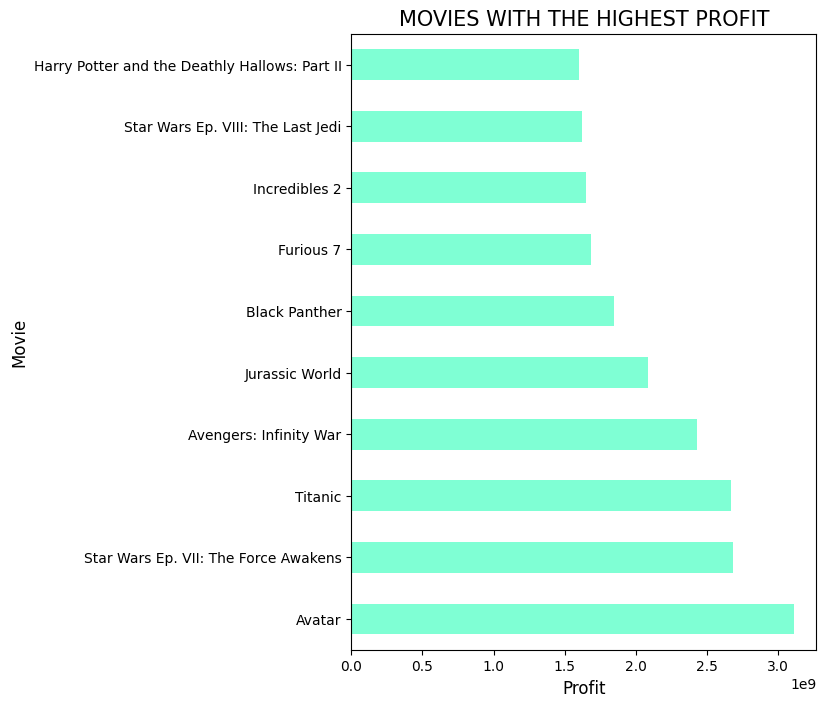

In [45]:
ax = profit_movies.plot(kind = 'barh', figsize = (6,8), color = '#7FFFD4')
ax.set_title ('MOVIES WITH THE HIGHEST PROFIT', fontsize = 15)
ax.set_xlabel('Profit', fontsize = 12)
ax.set_ylabel('Movie', fontsize = 12)

The graph above is a visualization of the top ten most profitable movies.

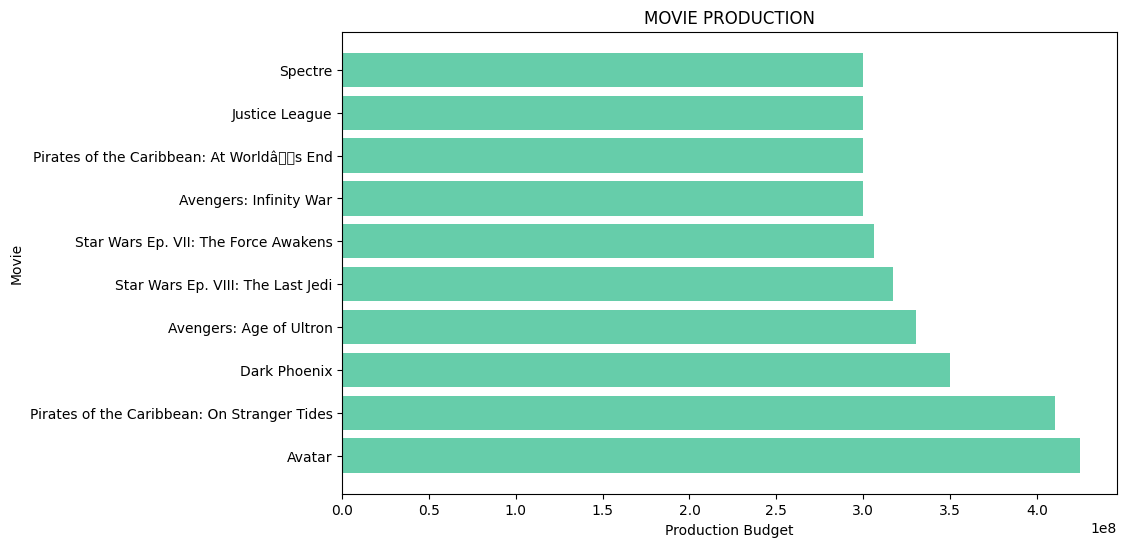

In [105]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar graph
ax.barh(movie_budgets['movie'][:10], movie_budgets['production_budget'][:10], color= '#66CDAA')

# Set the chart title and labels
ax.set_title('MOVIE PRODUCTION')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Movie')

# Show the chart
plt.show()

In [108]:
budget_mean= movie_budgets ['production_budget'].mean() 
budget_mean

31587757.0965064

In [46]:
#checking the distribution of the variable, profit
movie_budgets['profit'].describe()

count    5.782000e+03
mean     1.017730e+08
std      2.108880e+08
min     -1.574753e+08
25%     -3.098222e+05
50%      2.499538e+07
75%      1.111648e+08
max      3.111853e+09
Name: profit, dtype: float64

From the distribution, a few conclusions can be drawn:
1. The minimum value being negative means that there might be losses incurred or negative returns.
2. The maximum value suggests that some entries have very high values.
3. Overall,the variable has a wide range of values.

In [47]:
movie_budgets['profit_margin'] = (movie_budgets['profit']/movie_budgets['total_gross'])*100

In [48]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,87.983668
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08,68.089598
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08,-81.794855
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09,82.245087
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09,83.633668


###### Loading another data set for more insights

In [50]:
#loading the data into a dataframe
tm_movies = pd.read_csv('tmdb.movies.csv.gz')
#view the first five entries
tm_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [51]:
tm_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


This dataset has no missing values. Let's see if there are any duplicates and if so I drop them.

In [53]:
tm_duplicates = tm_movies[tm_movies.duplicated()]
tm_duplicates

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count


There are no duplicates in the dataset.

###### Next, merging of the datasets, to aid in getting more insights.

In [55]:
# merging the 1st and 3rd datasets
movie_analysis = pd.merge(bom_df,tm_movies, on = 'title' )
movie_analysis

,title,studio,domestic_gross,foreign_gross,year,total_gross,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.191000e+06,25148,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02,6.8,54
1697,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06,24042,"[53, 14]",448095,en,I Still See You,12.867,2018-10-12,6.8,196
1698,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05,24190,"[18, 10752, 53]",467952,en,The Catcher Was a Spy,9.727,2018-06-22,6.2,67
1699,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05,3594,"[35, 878]",92968,en,Time Freak,1.604,2011-02-10,6.9,9


In [56]:
#basic information of the merged dataset
movie_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 0 to 1700
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1701 non-null   object 
 1   studio             1701 non-null   object 
 2   domestic_gross     1701 non-null   float64
 3   foreign_gross      1701 non-null   float64
 4   year               1701 non-null   int64  
 5   total_gross        1701 non-null   float64
 6   Unnamed: 0         1701 non-null   int64  
 7   genre_ids          1701 non-null   object 
 8   id                 1701 non-null   int64  
 9   original_language  1701 non-null   object 
 10  original_title     1701 non-null   object 
 11  popularity         1701 non-null   float64
 12  release_date       1701 non-null   object 
 13  vote_average       1701 non-null   float64
 14  vote_count         1701 non-null   int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 212.6+ KB


In [57]:
movie_analysis.duplicated().sum()

0

The above merged dataset has no duplicates and no missing values.

In [109]:
# loading a new dataset into a dataframe
rt_movies = pd.read_csv('rt.movie_info.tsv.gz', delimiter = '\t',encoding = 'latin1')
rt_movies.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [110]:
#basic information of the dataset
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [111]:
#number of movies produced per rating
ratings = rt_movies['rating'].value_counts()
ratings

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

Text(0, 0.5, 'Number of movies produced')

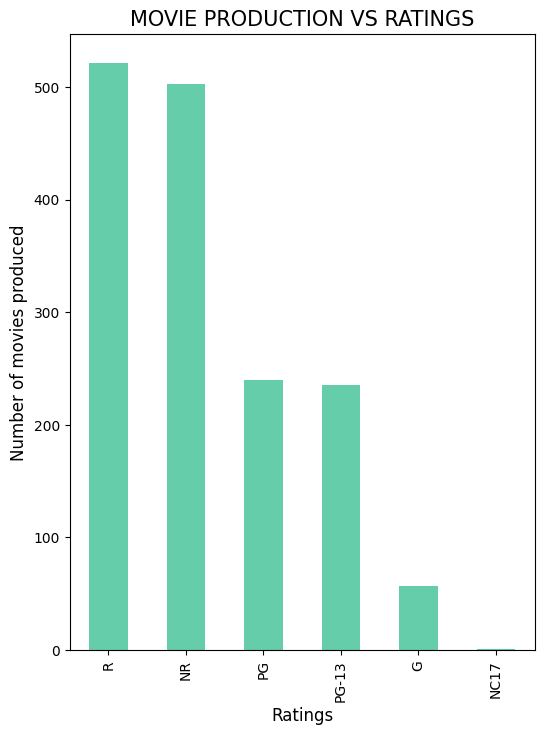

In [64]:
ax = ratings.plot(kind = 'bar', figsize = (6,8), color = '#66CDAA', width = 0.5)
ax.set_title ('MOVIE PRODUCTION VS RATINGS', fontsize = 15)
ax.set_xlabel('Ratings', fontsize = 12)
ax.set_ylabel('Number of movies produced', fontsize = 12)

In [93]:
# From the graph we can see the ratings of the movies produced. 

In [112]:
#merging the data sets to get more insights
movie_analysis2 = pd.merge(rt_movies,movie_analysis, on = 'id' )
movie_analysis2

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,year,total_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count
0,1771,"In the 1750s, young orphan John Mohune (Jon Wh...",NR,Action and Adventure|Drama,Fritz Lang,Jan Lustig|Margaret Fitts,"Jan 1, 1955","Jan 22, 1992",NaN,NaN,...,2011,3.706000e+08,2474,"[28, 12, 878]",en,Captain America: The First Avenger,25.808,2011-07-22,6.9,12810
1,1865,"When a weathered, God-fearing ex-blues musicia...",R,Drama,Craig Brewer,Craig Brewer,"Mar 2, 2007","Jun 26, 2007",$,"9,262,318",...,2011,1.045700e+09,2470,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,1930,Sharp-tongued East End spy Harry Palmer once a...,PG,Action and Adventure|Art House and Internation...,Guy Hamilton,Evan Jones,"Jan 1, 1966","Aug 14, 2001",NaN,NaN,...,2012,7.579000e+08,5186,"[28, 12, 14]",en,The Amazing Spider-Man,24.391,2012-07-04,6.5,10411


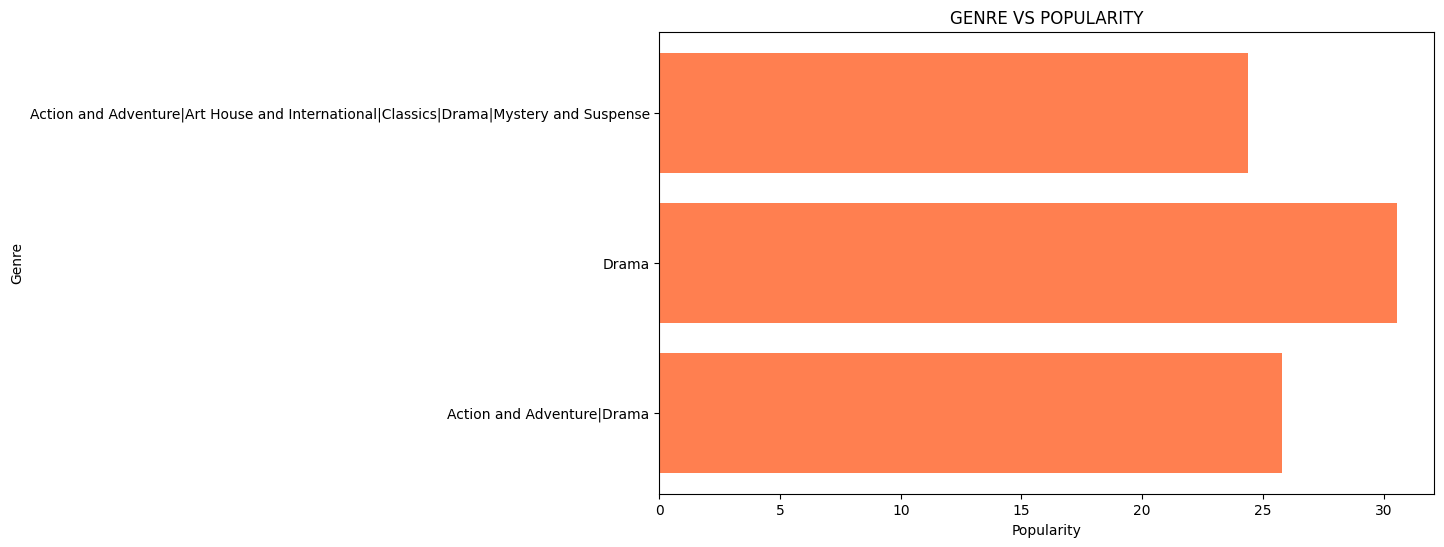

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar graph
ax.barh(movie_analysis2['genre'], movie_analysis2['popularity'], color= '#FF7F50')

# Set the chart title and labels
ax.set_title('GENRE VS POPULARITY')
ax.set_xlabel('Popularity')
ax.set_ylabel('Genre')

# Show the chart
plt.show()

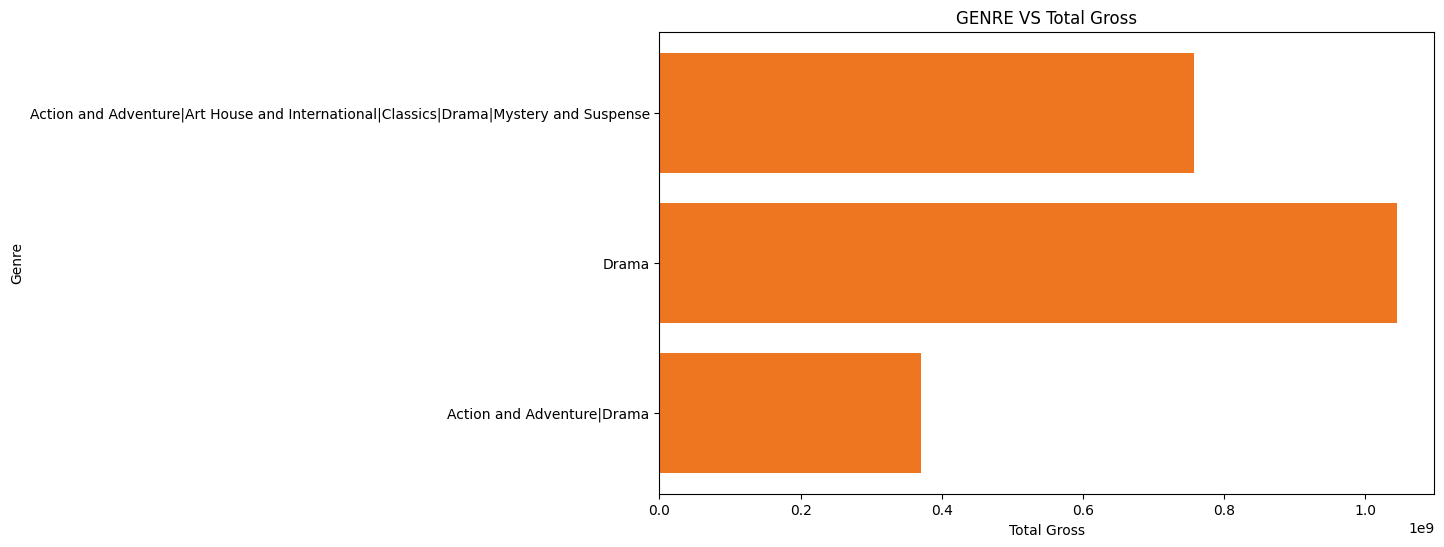

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar graph
ax.barh(movie_analysis2['genre'], movie_analysis2['total_gross'], color= '#EE7621')

# Set the chart title and labels
ax.set_title('GENRE VS Total Gross')
ax.set_xlabel('Total Gross')
ax.set_ylabel('Genre')

# Show the chart
plt.show()

In [75]:
movie_analysis3 = pd.merge(tm_movies,rt_movies ,on = 'id' )
movie_analysis3

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,PG-13,Comedy,Anthony Russo|Joe Russo,NaN,"Jul 13, 2006","Nov 21, 2006",$,"75,604,320",109 minutes,Universal Pictures
1,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,PG-13,Comedy,Anthony Russo|Joe Russo,NaN,"Jul 13, 2006","Nov 21, 2006",$,"75,604,320",109 minutes,Universal Pictures
2,10,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553,...,R,Action and Adventure|Art House and Internation...,Harmony Korine,Harmony Korine,"Mar 22, 2013","Jul 9, 2013",$,"13,900,000",93 minutes,A24 Films
3,2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553,...,R,Action and Adventure|Art House and Internation...,Harmony Korine,Harmony Korine,"Mar 22, 2013","Jul 9, 2013",$,"13,900,000",93 minutes,A24 Films
4,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",$,"5,051,927",116 minutes,Open Road Films
5,43,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562,...,PG,Comedy|Horror,NaN,NaN,NaN,NaN,NaN,NaN,80 minutes,NaN
6,24000,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562,...,PG,Comedy|Horror,NaN,NaN,NaN,NaN,NaN,NaN,80 minutes,NaN
7,117,"[18, 10402, 10749]",27,en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,...,NR,Musical and Performing Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,120,[878],830,en,Forbidden Planet,10.274,1956-03-15,Forbidden Planet,7.3,388,...,R,Art House and International|Comedy|Drama|Roman...,Ang Lee,Ang Lee|James Schamus|Neil Peng,"Aug 4, 1993","Jun 15, 2004",NaN,NaN,111 minutes,NaN
9,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,...,R,Drama,Craig Brewer,Craig Brewer,"Mar 2, 2007","Jun 26, 2007",$,"9,262,318",115 minutes,Paramount Vantage


In [82]:
#basic information of the merge
movie_analysis3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         32 non-null     int64  
 1   genre_ids          32 non-null     object 
 2   id                 32 non-null     int64  
 3   original_language  32 non-null     object 
 4   original_title     32 non-null     object 
 5   popularity         32 non-null     float64
 6   release_date       32 non-null     object 
 7   title              32 non-null     object 
 8   vote_average       32 non-null     float64
 9   vote_count         32 non-null     int64  
 10  synopsis           29 non-null     object 
 11  rating             32 non-null     object 
 12  genre              32 non-null     object 
 13  director           29 non-null     object 
 14  writer             21 non-null     object 
 15  theater_date       24 non-null     object 
 16  dvd_date           24 non-nu

In [81]:
#drop the missing values in the runtime column
m0vie_analysis3 = movie_analysis3.dropna(subset = ['runtime'])

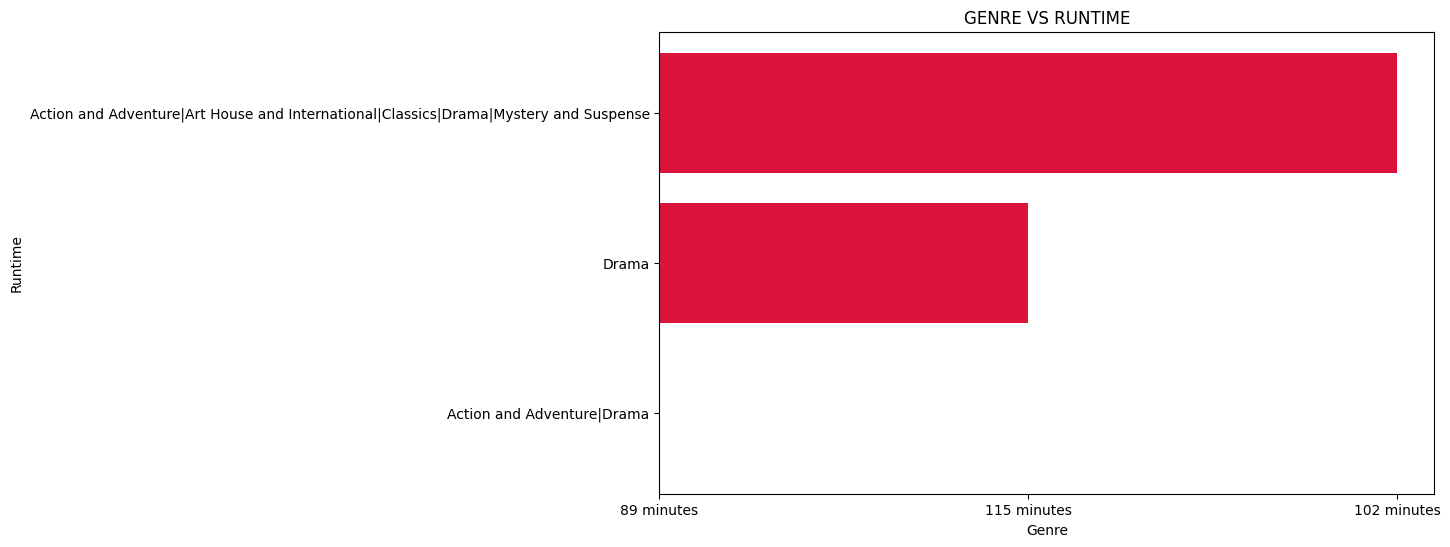

In [89]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar graph
ax.barh(movie_analysis2['genre'], movie_analysis2['runtime'], color= '#DC143C')

# Set the chart title and labels
ax.set_title('GENRE VS RUNTIME')
ax.set_xlabel('Genre')
ax.set_ylabel('Runtime')

# Show the chart
plt.show()